#2019 Canada Federal Election Sentiment Analysis

In [4]:


import numpy as np
import pandas as pd
import string
import nltk
import csv
import Corpus

from logistic import LogisticRegression
from MultiNB import MultinomialB
from svm import SVM 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
#from sklearn.svm import SVC
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [5]:
#Ingest the data
classified_txt = 'classified_tweets.txt'
unclassified_txt = 'cleanCdn3.txt'


classified_df = pd.read_csv(classified_txt, header=None, names=['Tweet_data'])

In [6]:
classified_df.head()

,Tweet_data
0,0 @switchfoot http://twitpic.com/2y1zl - Awww ...
1,0 is upset that he can't update his Facebook b...
2,0 @Kenichan I dived many times for the ball. M...
3,0 my whole body feels itchy and like its on fire
4,0 @nationwideclass no it's not behaving at al...


In [7]:
# Look at length of data set
len(classified_df)

200000

In [9]:
# Look at a sample record
print(classified_df.loc[0][0])

0 @switchfoot http://twitpic.com/2y1zl - Awww  that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


**Data Cleaning** 

We will strip the first character of each string which is a 0 (negative sentiment) or a 4 (positive sentiment) in this data set and store in a new column in the df

In [10]:
# Utility fucntion for pulling sentiment, and removing the value from original tweet string

def sentiment(tweet):
    sent = tweet[0]
    return sent
    
def strip(tweet):
    if tweet[0] is '0':
        new = tweet.strip('0')
    elif tweet[0] is '4':
        new = tweet.strip('4')
    return new

def clean_text(tweet):
    ''' Takes in text and removes any words in the useless list'''
    useless = nltk.corpus.stopwords.words("english") + list(string.punctuation)
    t = tweet.split()
    new_tweet = ""
    for word in t:
        if not word in useless:
            new_tweet = new_tweet + word + " "
    return new_tweet
    
    

In [11]:
# Use Apply method to utilize utility function over the data frame

classified_df['Sentiment'] = classified_df['Tweet_data'].apply(sentiment)
classified_df['Tweet'] = classified_df['Tweet_data'].apply(strip)

In [12]:
classified_df.head()

,Tweet_data,Sentiment,Tweet
0,0 @switchfoot http://twitpic.com/2y1zl - Awww ...,0,@switchfoot http://twitpic.com/2y1zl - Awww ...
1,0 is upset that he can't update his Facebook b...,0,is upset that he can't update his Facebook by...
2,0 @Kenichan I dived many times for the ball. M...,0,@Kenichan I dived many times for the ball. Ma...
3,0 my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,0 @nationwideclass no it's not behaving at al...,0,@nationwideclass no it's not behaving at all...


In [13]:
# Code to remove any unnecessary numbers in the strings as they can compromize tokens
classified_df['Tweet'] = classified_df['Tweet'].str.replace('(\d)','')

In [14]:
(classified_df['Tweet'][0])

" @switchfoot http://twitpic.com/yzl - Awww  that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [15]:
# Remove any of the useless words from our tweets
#clean_text(classified_df['Tweet'][0],useless_words) 

classified_df['Tweet'] = classified_df['Tweet'].apply(clean_text)
classified_df['Tweet']

0         @switchfoot http://twitpic.com/yzl Awww that's...
1         upset can't update Facebook texting it... migh...
2         @Kenichan I dived many times ball. Managed sav...
3                         whole body feels itchy like fire 
4         @nationwideclass behaving all. i'm mad. here? ...
                                ...                        
199995    @jvdouglas haha remark maternity leave fired l...
199996                                       @altitis you! 
199997    Okie doke!! Time escape North Massa's back tur...
199998                            finished lessons hooray! 
199999    Some ppl fucking KP. Cb Stop asking laa.. I lo...
Name: Tweet, Length: 200000, dtype: object

I will be using the **Term Frequency Inverse Document frequecy vectorizer** offered through sci-kit learn that helps to tokenize the strings data (puts more emphasis on words that unique), and generate feature vectors for training of the classification model

In [16]:
# Using Term Frequencies
# TfidVectorizer  = CountVectorizer + Tfidtransfirner

# Code to generate feature vectors from given classified tweets corpus
# This will generate a feature vectors to be used for training and classification of given tweet texts

# Split a training set and a test set (70:30)
data_train, data_test, target_train, target_test = train_test_split(classified_df['Tweet'], classified_df['Sentiment'], test_size=0.3)

# Create training features for the model, Vectorizer also removes list of stop words from features
vectorizer = TfidfVectorizer(stop_words="english")
training_features = vectorizer.fit_transform(data_train)

#Creating testing feature vectors based on the features fitted from the training data set
testing_features = vectorizer.transform(data_test)

#vectorizer.get_feature_names()

Train the **ML classifier** on this test set

In [17]:
# Train Naive Classifier  from scikit 

classifier_bayes = MultinomialNB(alpha = 1)
# Enter the feature vectors and the target sentiment values
classifier_bayes.fit(training_features,target_train)
#Train based on MultiNB class 
#classifier_NB= MultinomialB(alpha = 1)
#classifier_NB.fit(training_features,target_train)
# train  based on Logistic class
#logistic = LogisticRegression()
#logistic.fit(training_features,target_train)
# train based on SVM class
#svm = SVM(C=1, kernel='rbf')
#train_losses, val_losses = svm.fit(training_features,target_train,tol=.00001, val_acc_break=.82, max_epochs=8, log=True)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

Check the accuracy of the classifier on the test set through its in built scoreing fucntion

In [18]:
# Test the accuracy of the classifier on the test data

classifier_bayes.score(testing_features, target_test)
    
#classifier_NB.score(training_features,target_train)

#logistic.score(training_features,target_train)

#print("svm test accuracy: {:.2f}%".format(svm.accuracy(training_features,target_train)*100))
#svm.plot(train_losses, val_losses)

0.7489166666666667

Ingest the Unclassified tweets in a dataframe

In [19]:
unclassified_df = pd.read_csv(unclassified_txt, header=None, names=['Tweet'])
unclassified_df.head()

,Tweet
0,andrewscheer’s team uses pic chicago make clai...
1,scheer rally choices pride march nope ❌ climat...
2,young activists boosting climate movement flak...
3,fact check day justintrudeau claims fordnation...
4,wonder poison pill agreements made harper mea...


In [20]:
# Code to remove any unnecessary numbers in the strings as they can compromize tokens
unclassified_df['Tweet'] = unclassified_df['Tweet'].astype('str')
unclassified_df['Tweet'] = unclassified_df['Tweet'].str.replace('(\d)','')
unclassified_df['Tweet'] = unclassified_df['Tweet'].apply(clean_text)

unclassified_df['Tweet']

0        andrewscheer’s team uses pic chicago make clai...
1        scheer rally choices pride march nope ❌ climat...
2        young activists boosting climate movement flak...
3        fact check day justintrudeau claims fordnation...
4        wonder poison pill agreements made harper mean...
                               ...                        
99995    concerned fake news misinformation sway electi...
99996    trudeau photos brownface surface media loses m...
99997    andrew scheer never job wasnt government hes s...
99998    cdnpoli cdnmedia ethics trudeau elxn trudeaubl...
99999    poll tracker updated significant movement yest...
Name: Tweet, Length: 100000, dtype: object

In [21]:
# Generate feature vectors for the unclassified tweets based on trained data features 


unclassified_features = vectorizer.transform(unclassified_df['Tweet'])
# Get predictions 
unclassified_tweet_sentiments_bayes = classifier_bayes.predict(unclassified_features)
#unclassified_tweet_sentiments_bayes = classifier_NB.predict(unclassified_features)
#unclassified_tweet_sentiments_bayes = logistic.predict(unclassified_features)
#unclassified_tweet_sentiments_bayes = svm.predict(unclassified_features)


In [23]:
# Store the sentiment in a new column, NOTE 0 is negative, 4 is positive
unclassified_df['Sentiment'] = unclassified_tweet_sentiments_bayes

In [24]:
unclassified_df.head()

,Tweet,Sentiment
0,andrewscheer’s team uses pic chicago make clai...,0
1,scheer rally choices pride march nope ❌ climat...,4
2,young activists boosting climate movement flak...,4
3,fact check day justintrudeau claims fordnation...,0
4,wonder poison pill agreements made harper mean...,0


Need code to classify the tweets for the different major political parties,  a simple word frequency counter algorithm will be used to assign to each party

In [26]:
dic = { i:i**2 for i in range(0,10)}
1 in dic.keys()

True

In [27]:
# Preporcessor and tokenizer code

preprocessor = vectorizer.build_preprocessor()
tokenizer = vectorizer.build_tokenizer()

# Defining the bag_of_words function
def bag_of_words(tw):
    '''(str) -> dict
    Input: a string tw (a tweet line)
    Output: a python dictionary 
    '''
      
    unigram_ls = tokenizer(preprocessor(tw))
    
    #Create an empty dictionary
    bag_words = {}
    #Run through tokenized unigram list
    for item in unigram_ls:
        #Check to see if item is already a key in the dictionary
        if item in bag_words.keys():
            #If item already in dictionary as a key, increment key value by 1
            bag_words[item] += 1
        
        else:
            #For item in list, add item as key,set key value to 1
            bag_words[item] = 1
           
    return bag_words



# Defining the party function
def party(tw):
    '''
    (str) -> str
    Input: a string tw (a tweet line)
    Output: a string determining the political part for a tweet 
    
    '''
    #create a bag of words dictionary of the inputed tweet
    bag_words = bag_of_words(tw)
    
     # Create lists holding the hashtag words for each of the parties
    liberal_ls = ['ChooseForward', 'Justin', 'Trudeau', 'liberal', 'JustinTrudeau', 'LPC', 'LiberalParty', 'justin',
                  'justintrudeau', 'lpc']
    conservative_ls = ['Scheer', 'CPC', 'Conservative', 'Andrew', 'AndrewScheer', 'ConservativeParty', 'andrew',
                       'scheer', 'andrewscheer', 'cpchq']
    ndp_ls = ['JagmeetSingh', 'Singh', 'NDP', 'InItForYou', 'jagmeet', 'jagmeetsing', 'ndp']
    green_ls = ['GreenParty', 'Green', 'CanadianGreens', 'GPC', 'ElizabethMay', 'gpc', 'elizabeth', 'elizabethmay']
    bloc_ls = ['Bloc', 'BlocQc', 'Blanchet', 'bloc', 'blanchet']
    people_ls = ['MaximBernier', 'Bernier', 'bernier', 'maxim', 'maximbernier']

    # create intial party dictionary to hold nubmer of times (count) a party's associated keyword occurs
    party_dict = {'NDP': 0, 'Liberal': 0, 'Conservative': 0, 'Bloc': 0, 'Green': 0, 'People': 0}

    for key in bag_words:
        # Check if the key is a keyword in each of the political parties lists

        if key in liberal_ls:
            # Increase the count for keywords of that party by the number of times that keyword occurs
            party_dict['Liberal'] += bag_words[key]

        if key in conservative_ls:
            # Increase the count for keywords of that party by the number of times that keyword occurs
            party_dict['Conservative'] += bag_words[key]

        if key in ndp_ls:
            # Increase the count for keywords of that party by the number of times that keyword occurs
            party_dict['NDP'] += bag_words[key]

        if key in green_ls:
            # Increase the count for keywords of that party by the number of times that keyword occurs
            party_dict['Green'] += bag_words[key]

        if key in bloc_ls:
            # Increase the count for keywords of that party by the number of times that keyword occurs
            party_dict['Bloc'] += bag_words[key]

        if key in people_ls:
            # Increase the count for keywords of that party by the number of times that keyword occurs
            party_dict['People'] += bag_words[key]

            # create a new string party variable with default other
    # and update its value based on the party with the most frequency of keywords/hashtags
    party_name = 'People'
    for key in party_dict:
        if party_dict[key] > party_dict[party_name]:
            # update party name value
            party_name = key
    return party_name
    


In [28]:
# Run our Party assignement function through the data set
unclassified_df['Party'] = unclassified_df['Tweet'].apply(party)
unclassified_df.head(10)

,Tweet,Sentiment,Party
0,andrewscheer’s team uses pic chicago make clai...,0,Conservative
1,scheer rally choices pride march nope ❌ climat...,4,Conservative
2,young activists boosting climate movement flak...,4,People
3,fact check day justintrudeau claims fordnation...,0,Liberal
4,wonder poison pill agreements made harper mean...,0,People
5,every day justintrudeau says fordnation cut ta...,4,Liberal
6,canada kids go public school instead making su...,0,Conservative
7,trudeau star candidate activist steven guilbea...,4,Liberal
8,good question asking andrewscheer cpchq appoin...,4,Conservative
9,teach kids anticanadian energy rally need put ...,0,People


In [29]:
unclassified_df['Count'] = 1
unclassified_df.head(10)

,Tweet,Sentiment,Party,Count
0,andrewscheer’s team uses pic chicago make clai...,0,Conservative,1
1,scheer rally choices pride march nope ❌ climat...,4,Conservative,1
2,young activists boosting climate movement flak...,4,People,1
3,fact check day justintrudeau claims fordnation...,0,Liberal,1
4,wonder poison pill agreements made harper mean...,0,People,1
5,every day justintrudeau says fordnation cut ta...,4,Liberal,1
6,canada kids go public school instead making su...,0,Conservative,1
7,trudeau star candidate activist steven guilbea...,4,Liberal,1
8,good question asking andrewscheer cpchq appoin...,4,Conservative,1
9,teach kids anticanadian energy rally need put ...,0,People,1


In [30]:
party_db = unclassified_df[['Party','Sentiment','Count']]
print(party_db.groupby('Party').describe())

                Count                                   
                count mean  std  min  25%  50%  75%  max
Party                                                   
Bloc             62.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Conservative  21678.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Green           889.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Liberal       17729.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
NDP            2765.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
People        56877.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0


In [31]:
pvt_party = party_db.pivot_table(values='Count',index='Sentiment',columns='Party',aggfunc=np.sum)
pvt_party

Party,Bloc,Conservative,Green,Liberal,NDP,People
Sentiment,,,,,,
0,16,13269,301,3714,790,31821
4,46,8409,588,14015,1975,25056


In [32]:
# Renaming the Indices to reflect positive and negative statements
pvt_party = pvt_party.rename(index={'0':'Negative', '4':'Positive'})
pvt_party.transpose()

Sentiment,Negative,Positive
Party,,
Bloc,16,46
Conservative,13269,8409
Green,301,588
Liberal,3714,14015
NDP,790,1975
People,31821,25056


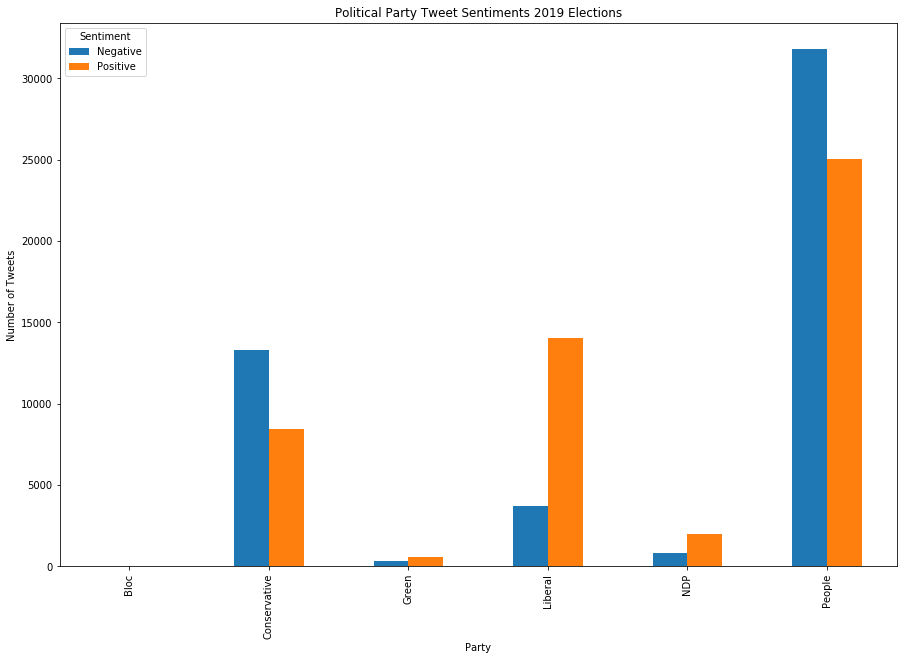

In [33]:
pvt_party.transpose().plot.bar(figsize=(15, 10))
# label the figure
plt.title('Political Party Tweet Sentiments 2019 Elections')
plt.ylabel('Number of Tweets')
plt.savefig('Politiacal Sentiments 2019 Elections.png', dpi=100)

In [34]:
pvt_party3 = pvt_party.transpose()
#conservative_sum = pvt_party2.loc['Conservative']['Negative'] + pvt_party2.loc['Conservative']['Positive']

#conservative_sum
pvt_party3

Sentiment,Negative,Positive
Party,,
Bloc,16,46
Conservative,13269,8409
Green,301,588
Liberal,3714,14015
NDP,790,1975
People,31821,25056


In [35]:
pvt_party3.sum(axis=1)
csum = pvt_party3.sum(axis=1).loc['Conservative']
lsum = pvt_party3.sum(axis=1).loc['Liberal']
nsum = pvt_party3.sum(axis=1).loc['NDP']
bsum = pvt_party3.sum(axis=1).loc['Bloc']
gsum = pvt_party3.sum(axis=1).loc['Green']
psum = pvt_party3.sum(axis=1).loc['People']

In [36]:
pvt_partyp =pvt_party3.copy()
pvt_partyp

Sentiment,Negative,Positive
Party,,
Bloc,16,46
Conservative,13269,8409
Green,301,588
Liberal,3714,14015
NDP,790,1975
People,31821,25056


In [37]:
pvt_partyp.loc['Conservative']['Negative'] = (pvt_party3.loc['Conservative']['Negative'] / csum) * 100.0
pvt_partyp.loc['Conservative']['Positive'] = (pvt_party3.loc['Conservative']['Positive'] / csum) * 100.0
pvt_partyp.loc['Liberal']['Negative'] = (pvt_party3.loc['Liberal']['Negative'] / lsum) * 100.0
pvt_partyp.loc['Liberal']['Positive'] = (pvt_party3.loc['Liberal']['Positive'] / lsum) * 100.0
pvt_partyp.loc['NDP']['Negative'] = (pvt_party3.loc['NDP']['Negative'] / nsum) * 100.0
pvt_partyp.loc['NDP']['Positive'] = (pvt_party3.loc['NDP']['Positive'] / nsum) * 100.0
pvt_partyp.loc['Bloc']['Negative'] = (pvt_party3.loc['Bloc']['Negative'] / bsum) * 100.0
pvt_partyp.loc['Bloc']['Positive'] = (pvt_party3.loc['Bloc']['Positive'] / bsum) * 100.0
pvt_partyp.loc['Green']['Negative'] = (pvt_party3.loc['Green']['Negative'] / gsum) * 100.0
pvt_partyp.loc['Green']['Positive'] = (pvt_party3.loc['Green']['Positive'] / gsum) * 100.0
pvt_partyp.loc['People']['Negative'] = (pvt_party3.loc['People']['Negative'] / psum) * 100.0
pvt_partyp.loc['People']['Positive'] = (pvt_party3.loc['People']['Positive'] / psum) * 100.0

pvt_partyp


Sentiment,Negative,Positive
Party,,
Bloc,25,74
Conservative,61,38
Green,33,66
Liberal,20,79
NDP,28,71
People,55,44


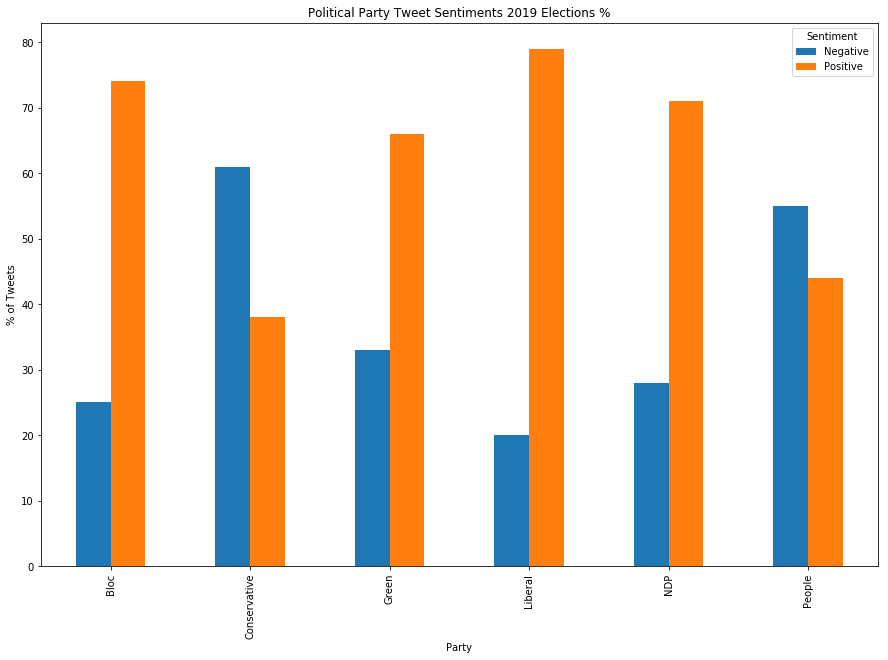

In [38]:
pvt_partyp.plot.bar(figsize=(15, 10))
# label the figure
plt.title('Political Party Tweet Sentiments 2019 Elections %')
plt.ylabel('% of Tweets')
plt.savefig('Politiacal Sentiments 2019 Elections %.png', dpi=100)
plt.show()